# Introdução

**Integrantes:**
- Francisco Lou - 2211275
- Vinicius Araujo - 2210392
- Felipe Fortini - 2220501
- Luca Lima - 2210831
- João Felipe Motta - 2211721

Neste trabalho, iremos:

- **Apresentar o objetivo**: Trabalhar com os dados e usar modelos para classificar risco de crédito.
- **Descrever o dataset**: "German Credit", composto por 1.000 registros e 9 atributos selecionados.


In [23]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [24]:
#Carregar dados
df = pd.read_csv('class_german_credit.csv')

# Mostrar dimensões 
print("Dimensões:", df.shape)

df.info()

# Mostrar primeiras linhas de dados
df.head()

Dimensões: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Descrição dos Atributos

### 1. **Age**
- **Tipo:** Numérico
- **Escala:** Razão
- **Cardinalidade:** Contínua
- **Explicação:** Idade em anos, com zero significativo e intervalo praticamente contínuo.

### 2. **Sex**
- **Tipo:** Categórico
- **Escala:** Nominal
- **Cardinalidade:** Binária
- **Explicação:** Male/female, sem hierarquia e com duas categorias.

### 3. **Job**
- **Tipo:** Numérico
- **Escala:** Razão
- **Cardinalidade:** Discreta
- **Explicação:** Níveis de emprego codificados em inteiros de 0 a 3.

### 4. **Housing**
- **Tipo:** Categórico
- **Escala:** Nominal
- **Cardinalidade:** Discreta
- **Explicação:** Tipo de moradia (own/rent/free), sem ordem.

### 5. **Saving accounts**
- **Tipo:** Categórico
- **Escala:** Nominal
- **Cardinalidade:** Discreta
- **Explicação:** Categorias de saldo (little, moderate, quite rich, rich).

### 6. **Checking account**
- **Tipo:** Categórico
- **Escala:** Nominal
- **Cardinalidade:** Discreta
- **Explicação:** Categorias de saldo em conta corrente (little, moderate, rich, etc.), sem relação ordinal numérica.

### 7. **Credit amount**
- **Tipo:** Numérico
- **Escala:** Razão
- **Cardinalidade:** Contínua
- **Explicação:** Valor do empréstimo em DM, com zero significativo e contínuo.

### 8. **Duration**
- **Tipo:** Numérico
- **Escala:** Razão
- **Cardinalidade:** Discreta
- **Explicação:** Duração em meses, valores inteiros.

### 9. **Purpose**
- **Tipo:** Categórico
- **Escala:** Nominal
- **Cardinalidade:** Discreta
- **Explicação:** Finalidade do crédito, sem hierarquia.

### 10. **Risk**
- **Tipo:** Categórico
- **Escala:** Nominal
- **Cardinalidade:** Binária
- **Explicação:** Alvo do modelo, good/bad.

In [25]:
descr = pd.DataFrame({
    'Atributo': [
        'Age', 'Sex', 'Job', 'Housing',
        'Saving accounts', 'Checking account',
        'Credit amount', 'Duration', 'Purpose', 'Risk'
    ],
    'Tipo': [
        'Numérico', 'Categórico', 'Numérico', 'Categórico',
        'Categórico', 'Categórico',
        'Numérico', 'Numérico', 'Categórico', 'Categórico'
    ],
    'Escala': [
        'Razão', 'Nominal', 'Razão', 'Nominal',
        'Nominal', 'Nominal',
        'Razão', 'Razão', 'Nominal', 'Nominal'
    ],
    'Cardinalidade': [
        'Contínua', 'Binária', 'Discreta', 'Discreta',
        'Discreta', 'Discreta',
        'Contínua', 'Discreta', 'Discreta', 'Binária'
    ]
})

descr

,Atributo,Tipo,Escala,Cardinalidade
0,Age,Numérico,Razão,Contínua
1,Sex,Categórico,Nominal,Binária
2,Job,Numérico,Razão,Discreta
3,Housing,Categórico,Nominal,Discreta
4,Saving accounts,Categórico,Nominal,Discreta
5,Checking account,Categórico,Nominal,Discreta
6,Credit amount,Numérico,Razão,Contínua
7,Duration,Numérico,Razão,Discreta
8,Purpose,Categórico,Nominal,Discreta
9,Risk,Categórico,Nominal,Binária


# Estatísticas Descritivas e Análise Exploratória

Aqui vamos:

1. Calcular estatísticas descritivas para os atributos numéricos (média, desvio-padrão, mínimo, máximo, etc.).
2. Gerar tabelas de frequência para os atributos categóricos.
3. Plotar visualizações simples (histogramas e boxplots) para identificar distribuições e possíveis outliers.

In [26]:
num_cols = ['Age', 'Credit amount', 'Duration']
stats_num = df[num_cols].describe().T
stats_num['missing'] = df[num_cols].isna().sum()
stats_num

,count,mean,std,min,25%,50%,75%,max,missing
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0,0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0,0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,0


## Atributos Numéricos

### Age
- **Média:** 35,55 anos  
- **Desvio-padrão:** 11,38 anos  
- **Mínimo:** 19 anos  
- **Máximo:** 75 anos  
- **Comentário:** A idade dos solicitantes varia de jovens adultos (19 anos) até seniores (75 anos), com concentração em torno dos 27–42 anos (25º–75º percentis). A dispersão moderada (std ~11) indica boa variedade etária, sem registros faltantes.  

### Credit amount
- **Média:** 3271,26 DM  
- **Desvio-padrão:** 2822,74 DM  
- **Mínimo:** 250 DM  
- **Máximo:** 18 424 DM  
- **Comentário:** Há grande amplitude de valores de empréstimo, de apenas 250 DM até 18 424 DM. A alta dispersão (std quase igual à média) sugere a presença de empréstimos muito elevados como outliers potenciais.  

### Duration
- **Média:** 20,90 meses  
- **Desvio-padrão:** 12,06 meses  
- **Mínimo:** 4 meses  
- **Máximo:** 72 meses  
- **Comentário:** A duração típica fica entre 12 e 24 meses (25º–75º percentis), mas há casos extremos de curta (4 meses) e longa duração (72 meses). A variabilidade indica perfis diferenciados de pagamento, sem valores ausentes.  

### Valores Faltantes
- Todas as três colunas numéricas apresentam **0 missing**.  

---

## Frequência dos Atributos Categóricos

- **Sex:** 69,0 % male, 31,0 % female.  
- **Job:** 63,0 % nível 2 (skilled), 20,0 % nível 1, 14,8 % nível 3, 2,2 % nível 0.  
- **Housing:** 71,3 % own, 17,9 % rent, 10,8 % free.  
- **Saving accounts:** 60,3 % little, 10,3 % moderate, 6,3 % quite rich, 4,8 % rich; 18,3 % missing.  
- **Checking account:** 27,4 % little, 26,9 % moderate, 6,3 % rich; 39,4 % missing.  
- **Purpose:** 33,7 % car, 28,0 % radio/TV, 18,1 % furniture/equipment, 9,7 % business, 5,9 % education, 2,2 % repairs, 1,2 % domestic appliances, 1,2 % vacation/others.  
- **Risk:** 70,0 % good, 30,0 % bad.  

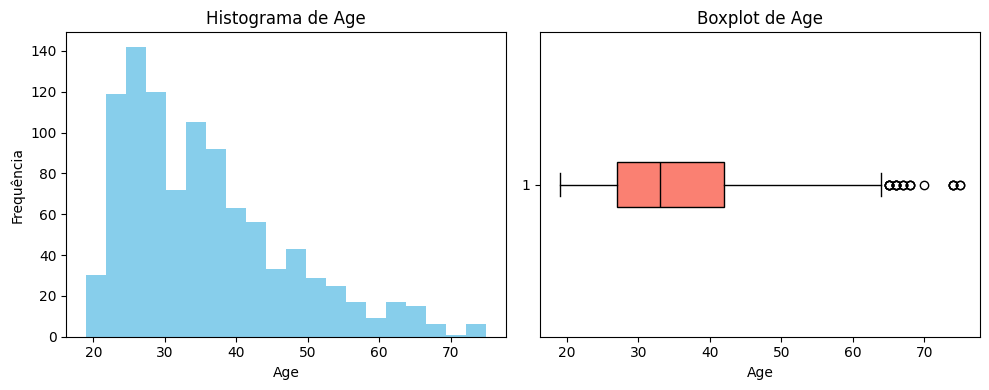

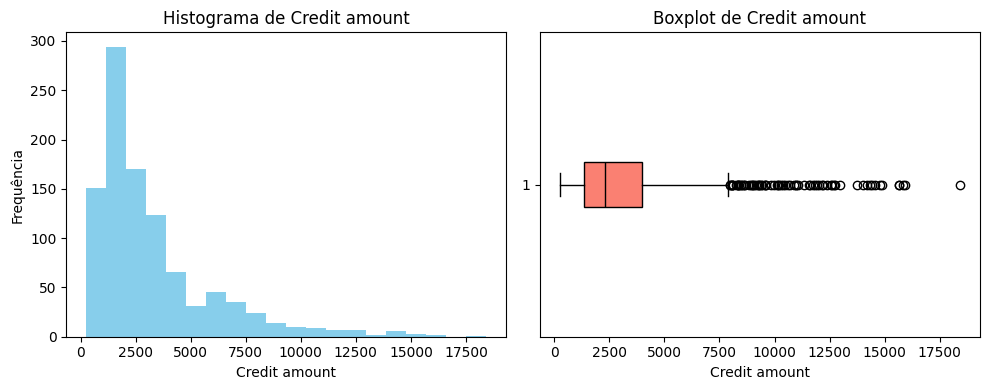

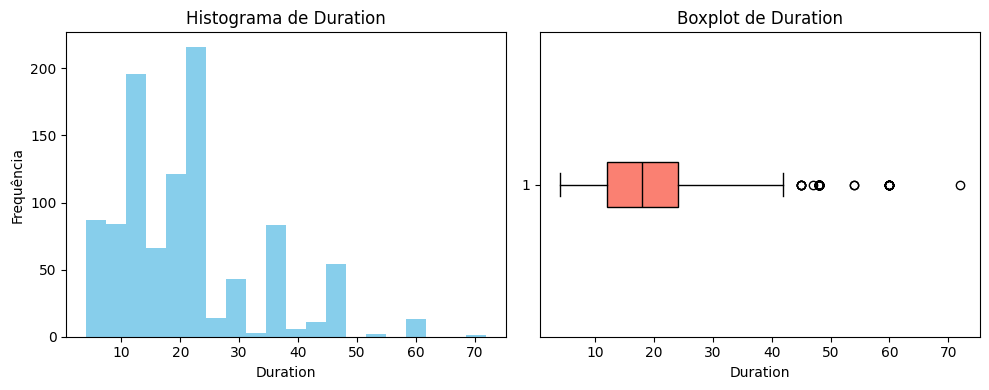

In [27]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
    
    # Histograma
    axes[0].hist(df[col].dropna(), bins=20, color='skyblue')
    axes[0].set_title(f"Histograma de {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequência")
    
    # Boxplot
    axes[1].boxplot(df[col].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='salmon'),
                    medianprops=dict(color='black'))
    axes[1].set_title(f"Boxplot de {col}")
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

# Análise das Distribuições e Outliers

## Distribuição de Idade (Age)
- **Assimetria (skew):** O histograma de *Age* mostra concentração maior entre 20 e 40 anos, com cauda direita estendendo-se até 75 anos. Isso indica **skew positivo (right-skewed)**.  
- **Outliers:** No boxplot, há pontos acima de ~60 anos que aparecem como outliers.  
- **Remoção?:** Esses valores extremos refletem clientes seniores válidos; não devem ser removidos, apenas monitorados no modelo.  

---

## Distribuição de Empréstimo (Credit amount)
- **Assimetria (skew):** O histograma de *Credit amount* é fortemente **right-skewed**, com a maior parte dos empréstimos entre 250 e 5 000 DM e longa cauda até ~18 424 DM.  
- **Outliers:** Muitos empréstimos acima de ~7 500 DM surgem como outliers no boxplot.  
- **Remoção?:** Esses “outliers” representam empréstimos altos reais e não devem ser eliminados. Como alternativa, pode-se aplicar **log-transform** para amenizar o skew antes de modelar.  

---

## Distribuição de Duração (Duration)
- **Assimetria (skew):** O histograma de *Duration* mostra um pico em torno de 12–24 meses e cauda à direita até 72 meses, indicando **ligeiro right-skew**.  
- **Outliers:** O boxplot aponta durações acima de ~36 meses como outliers.  
- **Remoção?:** Empréstimos de longa duração são plausíveis; manteremos esses casos, mas poderemos testar **discretização ou transformação** caso prejudiquem o modelo.  

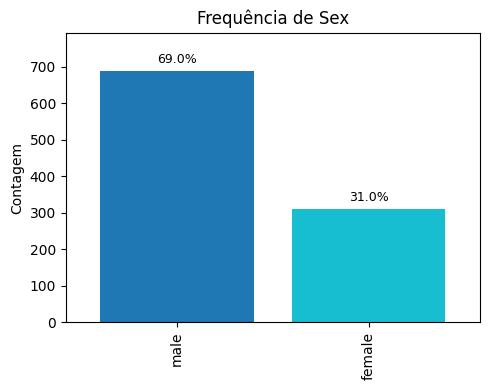

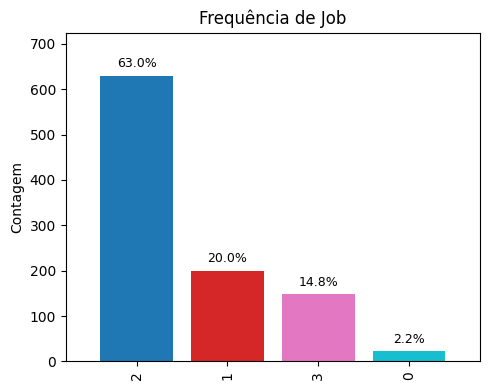

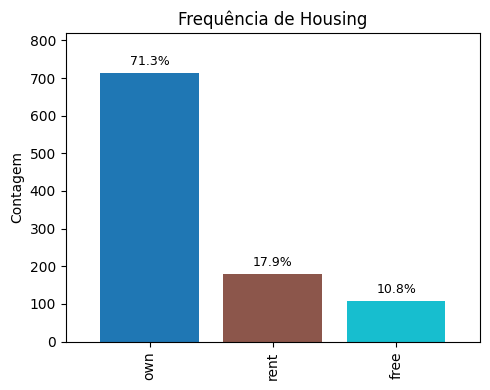

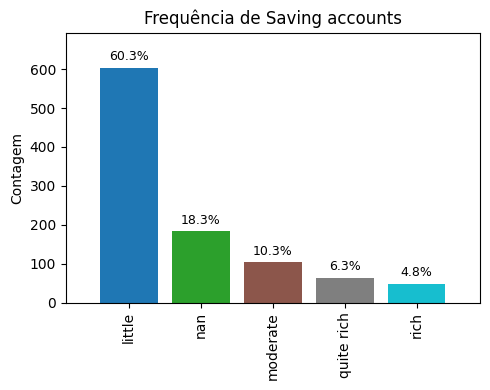

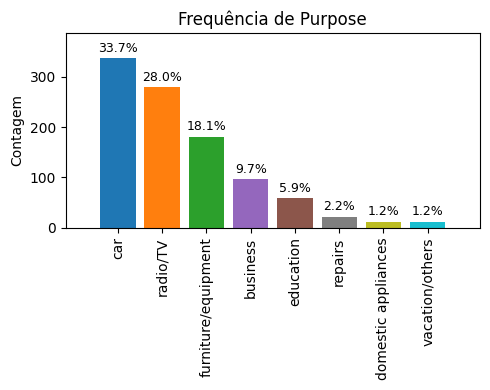

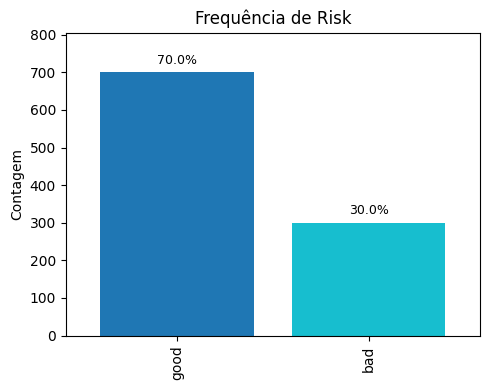

In [28]:
# 2) Frequência para variáveis categóricas
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Purpose', 'Risk']

cmap = plt.colormaps['tab10']  

for col in cat_cols:
    counts = df[col].value_counts(dropna=False)
    colors = cmap(np.linspace(0, 1, len(counts)))
    
    plt.figure(figsize=(5, 4))  
    bars = plt.bar(counts.index.astype(str), counts.values, color=colors)
    
    plt.title(f'Frequência de {col}')
    plt.ylabel('Contagem')
    plt.xticks(rotation=90)       
    plt.gca().margins(x=0.1)      
    plt.ylim(0, counts.max() * 1.15) 
    
    total = counts.sum()
    for bar, color in zip(bars, colors):
        h = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            h + counts.max() * 0.02,
            f'{h/total*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )
    
    plt.tight_layout()
    plt.show()

# Análise das Frequências Categóricas

- **Sex**
  - male: 69,0 %
  - female: 31,0 %
  - Há predominância masculina; vale verificar se o desempenho do modelo difere por gênero.

- **Job**
  - Nível 2 (skilled): 63,0 %
  - Nível 1: 20,0 %
  - Nível 3: 14,8 %
  - Nível 0: 2,2 %
  - A maioria é de profissionais qualificados (nível 2).
  - Categorias muito pequenas (nível 0) podem ser agrupadas posteriormente.

- **Housing**
  - own: 71,3 %
  - rent: 17,9 %
  - free: 10,8 %
  - A base concentra-se em proprietários, aluguel e moradia grátis têm menor representatividade.

- **Saving accounts**
  - little: 60,3 %
  - moderate: 10,3 %
  - quite rich: 6,3 %
  - rich: 4,8 %
  - missing: 18,3 %
  - Saldo baixo (“little”) domina.
  - ~18 % com falta de dado, imputados como “missing”.

- **Checking account**
  - little: 27,4 %
  - moderate: 26,9 %
  - rich: 6,3 %
  - missing: 39,4 %
  - Quase 40 % ausentes – criar categoria “missing” é crucial, pois pode indicar perfil de risco distinto.

- **Purpose**
  - car: 33,7 %
  - radio/TV: 28,0 %
  - furniture/equipment: 18,1 %
  - business: 9,7 %
  - education: 5,9 %
  - repairs: 2,2 %
  - domestic appliances: 1,2 %
  - vacation/others: 1,2 %
  - Principais usos são veículos e eletrônicos.
  - Categorias pequenas podem ser agrupadas em “other” para simplificar.

- **Risk**
  - good: 70,0 %
  - bad: 30,0 %
  - Classe desequilibrada, mas não ao ponto de exigir técnicas de balanceamento muito intensas (smote, etc.), embora possamos monitorar recall na classe minoritária.

---

> **Resumo:**
> - Visualmente confirmamos as proporções de cada categoria.
> - As grandes porcentagens de `missing` em `Saving accounts` e `Checking account` reforçam a necessidade de tratá-las com uma categoria explícita.
> - Categorias muito pequenas (por ex. `Job=0`, `Purpose <5 %`) poderão ser agrupadas em “other” se necessário para garantir estabilidade do modelo.


# Tratamento de Missing Values

Valores faltantes (“missing”) podem:

- Introduzir viés no modelo se simplesmente descartados.
- Causar perda de informação quando há muitos registros afetados.

Vamos primeiro quantificar o percentual de missings em cada coluna e, em seguida, imputar usando estratégias adequadas:

- Numéricos: mediana (robusta a outliers) — mas já não temos missings em num_cols.
- Categóricos: criar uma categoria explícita “missing”.

In [29]:
# Quantificando missings
missing = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

ms = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).sort_values('missing_pct', ascending=False)

ms

,missing_count,missing_pct
Checking account,394,39.4
Saving accounts,183,18.3
Sex,0,0.0
Age,0,0.0
Housing,0,0.0
Job,0,0.0
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [30]:
# Imputação simples para categóricos
cat_cols = ['Saving accounts', 'Checking account']

for col in cat_cols:
    df[col] = df[col].fillna('missing')

# Verificação pós-imputação
df[cat_cols].isna().sum()

Saving accounts     0
Checking account    0
dtype: int64

**Após a Imputação de Missing Values**  
- Substituímos todos os **NaN** em `Checking account` (39,4 %) e `Saving accounts` (18,3 %) pela categoria literal **“missing”**.  
- Optamos por criar uma categoria explícita em vez de descartar registros ou imputar pela moda/número dominante, porque:  
  1. **Preservamos potencial padrão**: a ausência de informação pode conter sinal (por exemplo, quem não declarou conta poupança pode ter perfil de risco distinto).  
  2. **Árvores de decisão lidam bem** com atributos categóricos, permitindo que ela crie um nó específico para “missing” e capture essa segmentação sem distorcer distribuições numéricas.  
- **Atenção**: um nível de missing alto (quase 40 % em `Checking account`) pode atrapalhar o poder preditivo.  
- Futuramente, poderemos agrupar “missing” junto a outra categoria—ou testar se a ausência combina melhor com “little” ou “moderate”.  
- Não houve necessidade de imputação em colunas numéricas (nenhum missing), mantendo suas distribuições originais.  


## Detecção e Tratamento de Outliers

Outliers são valores que se distanciam significativamente do restante dos dados e podem distorcer a construção de modelos.  
Neste passo, iremos:

1. **Detectar** outliers automaticamente usando a regra do IQR (Interquartile Range). 
   - É o método estatístico padrão de boxplot para identificar valores “muito distantes” do núcleo da distribuição.  
   - Facilita a detecção univariada e evita premissas de normalidade (diferente de z-score).

2. **Tratar** esses outliers de duas formas:
   - **Remoção** dos registros extremos, reduzindo ruído mas sacrificando parte dos dados.
   - **Winsorization**: limitar valores fora dos limites ao percentil 5 e 95, mas mantendo todos os registros. 


In [31]:
# Cálculo de limites de outliers pelo método IQR

outlier_info = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # registros abaixo de lower ou acima de upper
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_info[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'count_outliers': mask.sum()
    }

# Exibir resumo dos limites e contagem de outliers
pd.DataFrame(outlier_info).T

,lower_bound,upper_bound,count_outliers
Age,4.500,64.500,23.0
Credit amount,-2544.625,7882.375,72.0
Duration,-6.000,42.000,70.0


> **Interpretação dos Outliers Detectados**  
> - **Age**: limites em [4,5 – 64,5] anos → 23 registros fora desse intervalo (todos acima de 64,5 anos), representando clientes de idade muito elevada.  
> - **Credit amount**: limites em [–2 544,6 – 7 882,4] DM → 72 empréstimos acima de 7 882,4 DM; não há valores abaixo de zero, pois o limite inferior é irreal para esta variável.  
> - **Duration**: limites em [–6 – 42] meses → 70 contratos com duração acima de 42 meses (nenhum abaixo de zero, conforme esperado).  
>  
> Esses outliers refletem perfis extremos (empréstimos muito altos e prazos muito longos, bem como clientes muito idosos).  

In [32]:
# Tratamento de outliers

# Opção 1: Remoção de registros extremos
df_no_outliers = df.copy()
for col in num_cols:
    lower = outlier_info[col]['lower_bound']
    upper = outlier_info[col]['upper_bound']
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

# Opção 2: Winsorization (limitando aos percentis 5 e 95)
df_winsor = df.copy()
for col in num_cols:
    lower_pct = df[col].quantile(0.05)
    upper_pct = df[col].quantile(0.95)
    df_winsor[col] = np.clip(df[col], lower_pct, upper_pct)

# Comparação de quantidade de registros
pd.DataFrame({
    'Conjunto': ['original', 'sem_outliers', 'winsorized'],
    'n_registros': [df.shape[0], df_no_outliers.shape[0], df_winsor.shape[0]]
})


,Conjunto,n_registros
0,original,1000
1,sem_outliers,862
2,winsorized,1000


> **Comparação de Conjuntos após Tratamento de Outliers**  
> - **original**: 1 000 registros  
> - **sem_outliers**: 862 registros (remoção de 138 casos extremos, ou ~13,8% dos dados)  
> - **winsorized**: 1 000 registros (todos mantidos, mas valores abaixo do 5º percentil e acima do 95º foram “cortados” para esses limiares)  
>  
> **Análise:**  
> - A remoção elimina quase 14% dos exemplos, o que pode reduzir ruído, mas também descartar perfis potencialmente informativos (ex.: empréstimos muito altos ou durações longas).  
> - A winsorization preserva todos os registros e atenua o efeito de outliers, tornando as distribuições mais compactas sem perder representatividade.  

# Avaliação com Decision Tree

Agora vamos quantificar o impacto de cada etapa de limpeza de dados usando um Decision Tree:

* **original**: sem nenhum pré-processamento (apenas one-hot e split)
* **imputed**: após imputação de “missing” em `Saving` e `Checking accounts`
* **sem_outliers**: após remoção de outliers IQR
* **winsorized**: após Winsorization nos percentis 5 e 95

Usaremos **validação cruzada** (5 folds) para obter **acurácia**, **precisão** e **recall** em cada cenário.

In [33]:
df['Risk_code'] = df['Risk'].map({'bad': 0, 'good': 1})
df_no_outliers['Risk_code'] = df_no_outliers['Risk'].map({'bad': 0, 'good': 1})
df_winsor['Risk_code']     = df_winsor['Risk'].map({'bad': 0, 'good': 1})

def eval_dt(X, y):
    clf = DecisionTreeClassifier(random_state=42)
    return {
        'accuracy': cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean(),
        'precision': cross_val_score(clf, X, y, cv=5, scoring='precision').mean(),
        'recall': cross_val_score(clf, X, y, cv=5, scoring='recall').mean()
    }

# 3) Preparar X e y para cada cenário
# a) original
X_base    = pd.get_dummies(df.drop(['Risk','Risk_code'], axis=1))
y_base    = df['Risk_code']

# b) imputed (df já tem Risk_code e imputação feita)
X_imputed = pd.get_dummies(df.drop(['Risk','Risk_code'], axis=1))
y_imputed = df['Risk_code']

# c) sem outliers
X_no_out  = pd.get_dummies(df_no_outliers.drop(['Risk','Risk_code'], axis=1))
y_no_out  = df_no_outliers['Risk_code']

# d) winsorized
X_win     = pd.get_dummies(df_winsor.drop(['Risk','Risk_code'], axis=1))
y_win     = df_winsor['Risk_code']

# 4) Avaliar todos os cenários
results = {
    'original':    eval_dt(X_base,    y_base),
    'imputed':     eval_dt(X_imputed, y_imputed),
    'sem_outliers':eval_dt(X_no_out,  y_no_out),
    'winsorized':  eval_dt(X_win,     y_win)
}

# 5) Exibir resultados em tabela com 'Pré-processamento' como coluna
res_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Pré-processamento'})
display(res_df.round(3))

,Pré-processamento,accuracy,precision,recall
0,original,0.662,0.754,0.769
1,imputed,0.662,0.754,0.769
2,sem_outliers,0.681,0.793,0.767
3,winsorized,0.669,0.761,0.769


## Análise dos Resultados com Decision Tree

### Original vs. Imputed

* A imputação de valores faltantes não alterou nenhuma métrica, indicando que a categoria “missing” foi tratada de forma neutra: o DT aprendeu sem ganhos nem perdas de performance.

### Sem Outliers

* **Acurácia** subiu de 0.662 → 0.681 (+1,9 p.p.).
* **Precisão** saltou de 0.754 → 0.793 (+3,9 p.p.), sugerindo menos falsos positivos.
* **Recall** manteve-se próximo (0.769 → 0.767).
* **Interpretação:** Remover casos extremos reduziu ruído e melhorou a capacidade de classificar corretamente “good” versus “bad”, mas manteve a sensibilidade ao risco.

### Winsorized

* **Acurácia** melhorou levemente a 0.669 (+0,7 p.p.).
* **Precisão** ficou em 0.761 (+0,7 p.p.).
* **Recall** manteve-se em 0.769.
* **Interpretação:** Ao invés de excluir registros, limitar valores extremos trouxe ganhos moderados, preservando todo o conjunto e garantindo estabilidade.

### Conclusão

* A **remoção de outliers** apresentou o maior ganho em acurácia e precisão, recomendada quando a perda de ~14% dos dados é aceitável.
* A **winsorization** é uma alternativa mais conservadora, com ganhos menores, mas sem descartar registros.
* A **imputação** não impactou o DT, confirmando que a categoria “missing” foi assimilada sem viés.